In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [33]:
path = os.path.realpath("NBA EDA")
dir = os.path.dirname(path)
dir = dir.replace('notebooks', 'data')

df_2022 = pd.read_csv("interim/2022_cleaned.csv")
df_2023 = pd.read_csv("interim/2023_cleaned.csv")

In [34]:
df_2022.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,131,146,327,473,82,37,41,84,151,664
1,1,Steven Adams,C,28,MEM,76,75,1999,210,384,...,199,349,411,760,256,65,60,115,153,528
2,2,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,340,137,427,564,190,80,44,148,171,1068
3,3,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,32,33,54,87,21,6,10,16,36,132
4,4,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,102,73,185,258,42,14,47,44,78,607


In [35]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  605 non-null    int64 
 1   Player      605 non-null    object
 2   Pos         605 non-null    object
 3   Age         605 non-null    int64 
 4   Tm          605 non-null    object
 5   G           605 non-null    int64 
 6   GS          605 non-null    int64 
 7   MP          605 non-null    int64 
 8   FG          605 non-null    int64 
 9   FGA         605 non-null    int64 
 10  3P          605 non-null    int64 
 11  3PA         605 non-null    int64 
 12  2P          605 non-null    int64 
 13  2PA         605 non-null    int64 
 14  FT          605 non-null    int64 
 15  FTA         605 non-null    int64 
 16  ORB         605 non-null    int64 
 17  DRB         605 non-null    int64 
 18  TRB         605 non-null    int64 
 19  AST         605 non-null    int64 
 20  STL       

In [36]:
df_2022.describe()

,Unnamed: 0,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,...,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,302.000000,25.750413,43.039669,20.330579,981.401653,165.173554,358.218182,50.575207,143.033058,114.598347,...,88.894215,42.019835,138.719008,180.738843,100.224793,31.028099,19.163636,53.085950,79.844628,449.776860
std,174.792734,4.122566,25.816438,25.803187,809.444495,165.532088,353.370974,59.691423,160.095022,125.883575,...,109.559105,50.028862,137.640550,179.852703,122.090873,28.759810,23.767528,56.788115,64.301641,457.091023
min,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.000000,23.000000,17.000000,0.000000,195.000000,24.000000,55.000000,3.000000,12.000000,15.000000,...,10.000000,7.000000,24.000000,33.000000,12.000000,5.000000,3.000000,8.000000,18.000000,67.000000
50%,302.000000,25.000000,48.000000,7.000000,883.000000,116.000000,262.000000,27.000000,85.000000,74.000000,...,54.000000,26.000000,104.000000,135.000000,59.000000,26.000000,12.000000,39.000000,70.000000,319.000000
75%,453.000000,28.000000,66.000000,35.000000,1670.000000,255.000000,553.000000,79.000000,234.000000,174.000000,...,125.000000,58.000000,209.000000,271.000000,145.000000,49.000000,25.000000,75.000000,128.000000,685.000000
max,604.000000,41.000000,82.000000,82.000000,2854.000000,774.000000,1564.000000,285.000000,750.000000,724.000000,...,803.000000,349.000000,813.000000,1019.000000,737.000000,138.000000,177.000000,303.000000,286.000000,2155.000000


In [37]:
df_2022.duplicated().sum()

0

In [38]:
# Add 2023 Fantasy Points to 2022 data
# THIS IS INCORRECT, NEED TO MATCH PLAYER NAME FROM 2023 TO 2022 DATA

df_2022['2023_Perf'] = df_2023['PTS'] + (df_2023['FG'] * 2) + df_2023['3P'] + df_2023['FT'] + df_2023['TRB'] + (df_2023['AST'] * 2) + (df_2023['STL'] * 4) + (df_2023['BLK'] * 4) - df_2023['FGA'] - df_2023['FTA'] - (df_2023['TOV'] * 2)

In [39]:
df_2022[['Player', '2023_Perf']]

,Player,2023_Perf
0,Precious Achiuwa,1042.0
1,Steven Adams,1179.0
2,Bam Adebayo,2932.0
3,Santi Aldama,776.0
4,LaMarcus Aldridge,1540.0
...,...,...
600,Thaddeus Young,NaN
601,Trae Young,NaN
602,Omer Yurtseven,NaN
603,Cody Zeller,NaN


In [40]:
df_2022.corr()

,Unnamed: 0,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2023_Perf
Unnamed: 0,1.000000,-0.075163,-0.057763,-0.090461,-0.075920,-0.078219,-0.078477,-0.057443,-0.058990,-0.075617,...,-0.040026,-0.084921,-0.076124,-0.036925,-0.068331,-0.041312,-0.052057,-0.037468,-0.080408,-0.064657
Age,-0.075163,1.000000,0.093927,0.093258,0.110041,0.075664,0.070930,0.102412,0.090239,0.050934,...,0.041574,0.113511,0.098434,0.121697,0.091900,0.046344,0.074043,0.095355,0.082239,-0.019905
G,-0.057763,0.093927,1.000000,0.657464,0.894795,0.766170,0.767522,0.668151,0.686159,0.690660,...,0.595836,0.752503,0.741629,0.624938,0.789326,0.572982,0.688451,0.870468,0.757981,-0.027113
GS,-0.090461,0.093258,0.657464,1.000000,0.867597,0.843296,0.826735,0.642648,0.651038,0.804172,...,0.580075,0.785019,0.762129,0.724850,0.756426,0.579667,0.788592,0.775281,0.835372,-0.045213
MP,-0.075920,0.110041,0.894795,0.867597,1.000000,0.928587,0.931105,0.795685,0.810892,0.843759,...,0.586672,0.845621,0.810343,0.790472,0.878090,0.595008,0.848528,0.895129,0.924978,-0.034967
FG,-0.078219,0.075664,0.766170,0.843296,0.928587,1.000000,0.985864,0.764978,0.780381,0.952225,...,0.552920,0.847974,0.802755,0.817679,0.798057,0.563277,0.910411,0.814389,0.994712,-0.045667
FGA,-0.078477,0.070930,0.767522,0.826735,0.931105,0.985864,1.000000,0.834455,0.854502,0.900692,...,0.462249,0.801577,0.742026,0.834436,0.808369,0.492789,0.911055,0.793849,0.989695,-0.055986
3P,-0.057443,0.102412,0.668151,0.642648,0.795685,0.764978,0.834455,1.000000,0.992318,0.531738,...,0.138659,0.528455,0.442994,0.663024,0.691884,0.233550,0.680607,0.608634,0.797240,-0.045921
3PA,-0.058990,0.090239,0.686159,0.651038,0.810892,0.780381,0.854502,0.992318,1.000000,0.555635,...,0.151842,0.549361,0.462661,0.684584,0.709604,0.252130,0.707731,0.628819,0.812140,-0.054247
2P,-0.075617,0.050934,0.690660,0.804172,0.843759,0.952225,0.900692,0.531738,0.555635,1.000000,...,0.661320,0.864472,0.845533,0.760824,0.721337,0.629943,0.874426,0.782289,0.929973,-0.038059


<AxesSubplot:>

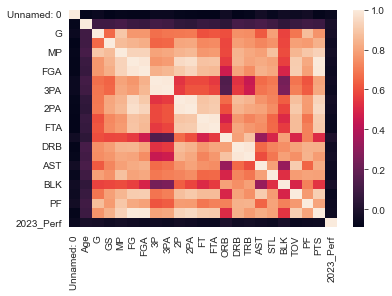

In [41]:
sns.heatmap(df_2022.corr())